In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df=pd.read_csv(r"C:\Users\Ganesh Jaiswar\Desktop\ODINSCHOOL\EDA AND ML\Price Prediction\Gold Predict\train_u6lujuX_CVtuZ9i.csv")
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


# Statistics

In [3]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
df.shape

(614, 13)

In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Feature Engineering

## Filling Null Value 

In [7]:
null_percentage = (df.isnull().mean() * 100).round(2)
null_percentage

Loan_ID              0.00
Gender               2.12
Married              0.49
Dependents           2.44
Education            0.00
Self_Employed        5.21
ApplicantIncome      0.00
CoapplicantIncome    0.00
LoanAmount           3.58
Loan_Amount_Term     2.28
Credit_History       8.14
Property_Area        0.00
Loan_Status          0.00
dtype: float64

In [8]:
df.columns[df.isnull().sum() > 1]

Index(['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [9]:
gender=df['Gender'].mode()[0]
gender

'Male'

In [10]:
married=df['Married'].mode()[0]
married

'Yes'

In [11]:
self_Employed=df['Self_Employed'].mode()[0]
self_Employed

'No'

In [12]:
depents=df['Dependents'].mode()[0]
depents

'0'

In [13]:
names=df[['Gender','Married','Self_Employed','Dependents']]

In [14]:
for name in names:
    mode_value=df[name].mode()[0]
    df[name].fillna(mode_value, inplace=True)


In [15]:
df.columns[df.isnull().sum() > 1]

Index(['LoanAmount', 'Loan_Amount_Term', 'Credit_History'], dtype='object')

In [16]:
loan_amount=df['LoanAmount'].mean()
loan_amount

146.41216216216216

In [17]:
loan_amount_term=df['Loan_Amount_Term'].mean()
loan_amount_term

342.0

In [18]:
credit_history=df['Credit_History'].mean()
credit_history

0.8421985815602837

In [19]:
loan=df[['LoanAmount','Loan_Amount_Term','Credit_History']]

In [20]:
for i in loan:
    loan_mean=df[i].mean()
    df[i].fillna(loan_mean,inplace=True)

In [21]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# EDA

In [22]:
categorical_data=df.select_dtypes('object')
categorical_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,Urban,Y


In [23]:
numerical_data=df.select_dtypes(['int','float'])
numerical_data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,146.412162,360.0,1.0
1,4583,1508.0,128.000000,360.0,1.0
2,3000,0.0,66.000000,360.0,1.0
3,2583,2358.0,120.000000,360.0,1.0
4,6000,0.0,141.000000,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.000000,360.0,1.0
610,4106,0.0,40.000000,180.0,1.0
611,8072,240.0,253.000000,360.0,1.0
612,7583,0.0,187.000000,360.0,1.0


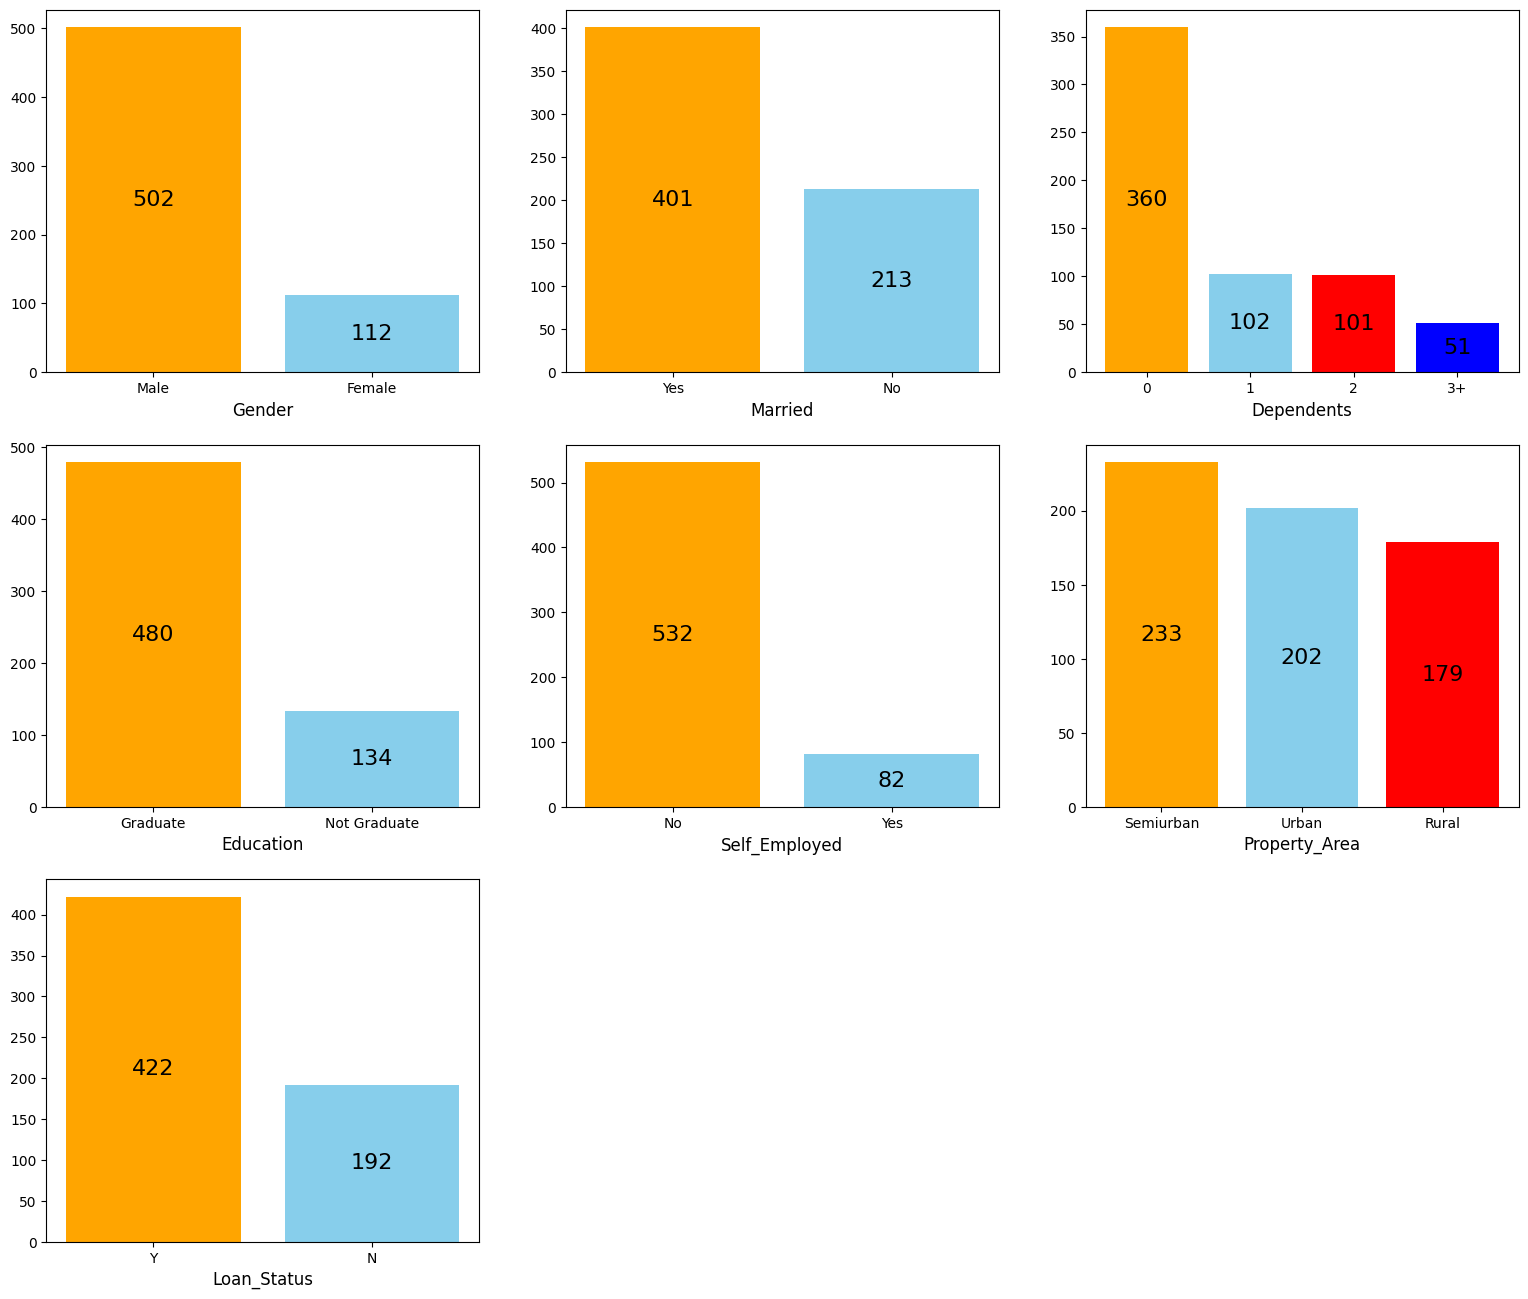

In [24]:
plt.figure(figsize=(19,16))
count=df['Gender'].value_counts()
colors=['orange','skyblue','red','blue','green','c','hotpink']
n=0
for i in [ 'Gender', 'Married', 'Dependents', 'Education','Self_Employed', 'Property_Area', 'Loan_Status']:
    count=df[i].value_counts()
    n+=1
    plt.subplot(3,3,n)
    bar_plot = plt.bar(x=count.index, height=count,color=colors,linewidth=0.6,)
    plt.bar_label(bar_plot,labels=count.values,label_type='center',color='black',fontsize=16)
    plt.xlabel(i,fontsize=12,loc='center')

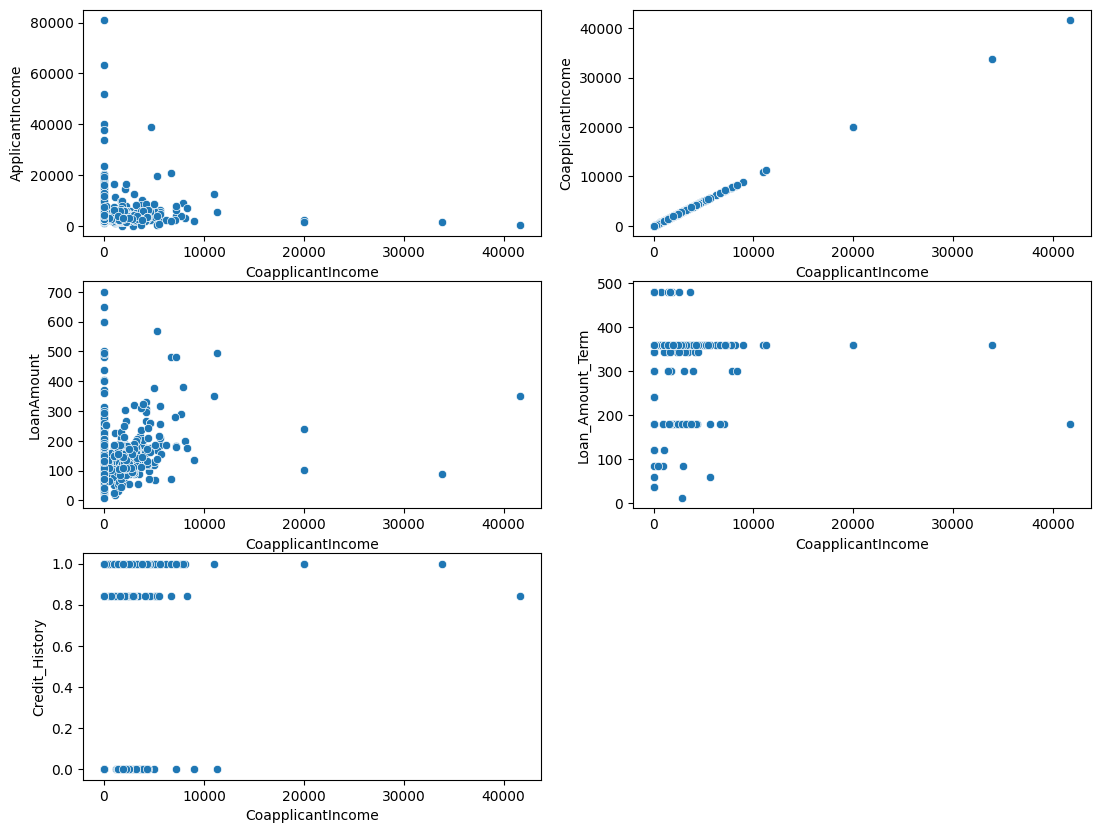

In [25]:
plt.figure(figsize=(13,10))
n=0
for i in numerical_data:
    n+=1
    plt.subplot(3,2,n)
    sns.scatterplot(data=df,y=df[i],x='CoapplicantIncome')
    

In [26]:
def plot(data):
    fig = sns.boxplot(data=df,y=data)
    return fig


<Axes: ylabel='ApplicantIncome'>

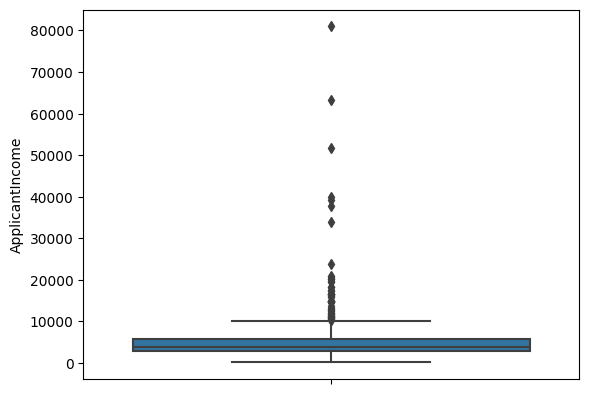

In [27]:
plot('ApplicantIncome')

<Axes: ylabel='CoapplicantIncome'>

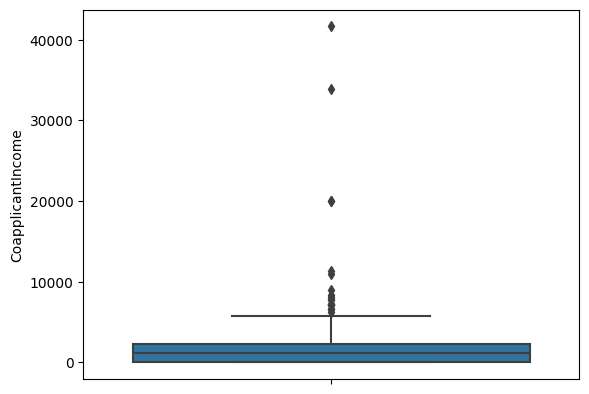

In [28]:
plot('CoapplicantIncome')

<Axes: ylabel='LoanAmount'>

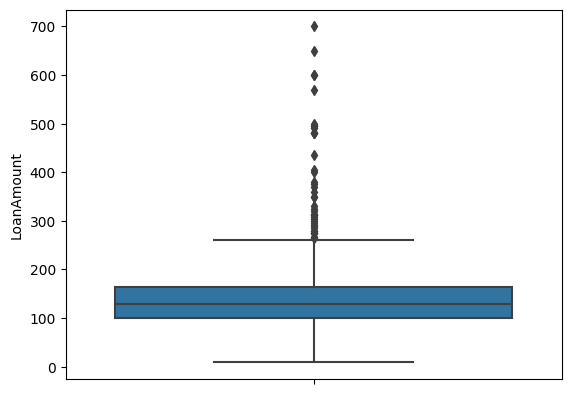

In [29]:
plot('LoanAmount')

<Axes: ylabel='Loan_Amount_Term'>

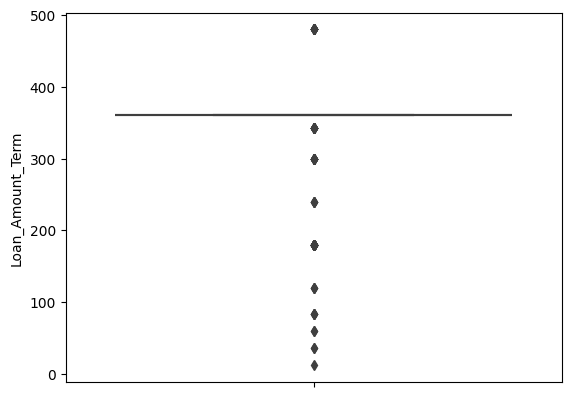

In [30]:
plot('Loan_Amount_Term')

<Axes: ylabel='Credit_History'>

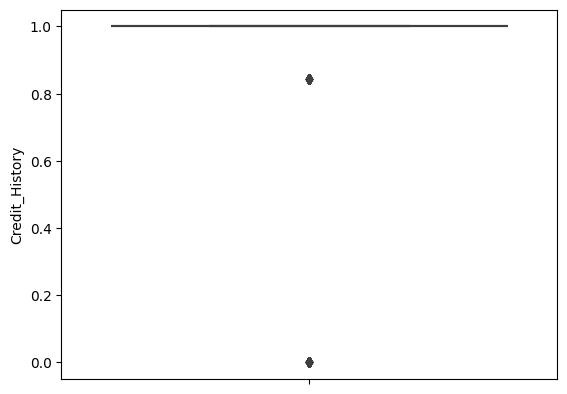

In [31]:
plot('Credit_History')

# Encoding Method

In [32]:
categorical_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [33]:
from sklearn.preprocessing import LabelEncoder
encd=LabelEncoder()

for i in categorical_data:
    df[i]=encd.fit_transform(df[i])

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    int32  
 1   Gender             614 non-null    int32  
 2   Married            614 non-null    int32  
 3   Dependents         614 non-null    int32  
 4   Education          614 non-null    int32  
 5   Self_Employed      614 non-null    int32  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int32  
 12  Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(8), int64(1)
memory usage: 43.3 KB


<Axes: >

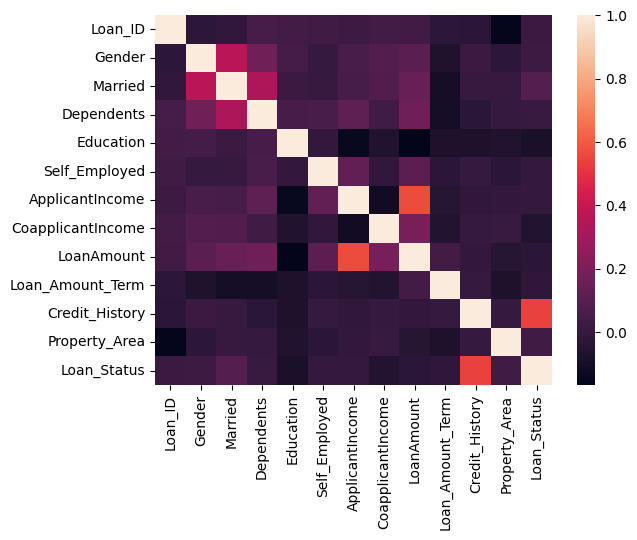

In [35]:
corr=df.corr()
sns.heatmap(corr)

# Split Data into train and test

In [36]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [37]:
x=df[['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']]
y=df['Loan_Status']

In [38]:
from imblearn.over_sampling import RandomOverSampler
over_sampled=RandomOverSampler(random_state=0)
X_resample,y_resample=over_sampled.fit_resample(x,y)
print(X_resample.shape)
print(y_resample.shape)

(844, 11)
(844,)


In [39]:
from imblearn.under_sampling import RandomUnderSampler
under_sampled =RandomUnderSampler(sampling_strategy='majority',random_state=1)
X_reshap,y_reshap=under_sampled.fit_resample(x,y)
print(X_reshap.shape)
print(y_reshap.shape)

(384, 11)
(384,)


In [40]:
# over_sampling
print('Over Sample Result',y_resample.value_counts())

print('Under Sample Result',y_reshap.value_counts())


Over Sample Result Loan_Status
1    422
0    422
Name: count, dtype: int64
Under Sample Result Loan_Status
0    192
1    192
Name: count, dtype: int64


In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_reshap,y_reshap,random_state=42,test_size=0.20,shuffle=True)

In [42]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(307, 11)
(77, 11)
(307,)
(77,)


# Hyperparameter Tunning

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rdm=RandomForestClassifier()
rdm_grid=RandomForestClassifier()
param_grid = {
    'n_estimators': [50, 80,100, 120,160,200],
    'max_depth': [None, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_search_cv = GridSearchCV(estimator=rdm_grid, param_grid=param_grid, cv=5, scoring='accuracy',)
grid_search_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 15, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 80, 100, 120, 160, 200]},
             scoring='accuracy')

In [44]:
best_estimator=grid_search_cv.best_estimator_
best_param=grid_search_cv.best_params_

print(best_estimator)
print('-'*50)
print(best_param)

RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_split=5)
--------------------------------------------------
{'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 5, 'n_estimators': 100}


In [45]:
y_pred_grid=best_estimator.predict(X_test)

# Evaluate Model

In [46]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [47]:
accuracy_rdm_grid=accuracy_score(y_pred_grid,y_test)
accuracy_rdm_grid

0.6623376623376623

In [48]:
cnfm=confusion_matrix(y_pred_grid,y_test)
cnfm

array([[22,  1],
       [25, 29]], dtype=int64)

In [49]:
clr=classification_report(y_pred_grid,y_test)
print(clr)

              precision    recall  f1-score   support

           0       0.47      0.96      0.63        23
           1       0.97      0.54      0.69        54

    accuracy                           0.66        77
   macro avg       0.72      0.75      0.66        77
weighted avg       0.82      0.66      0.67        77



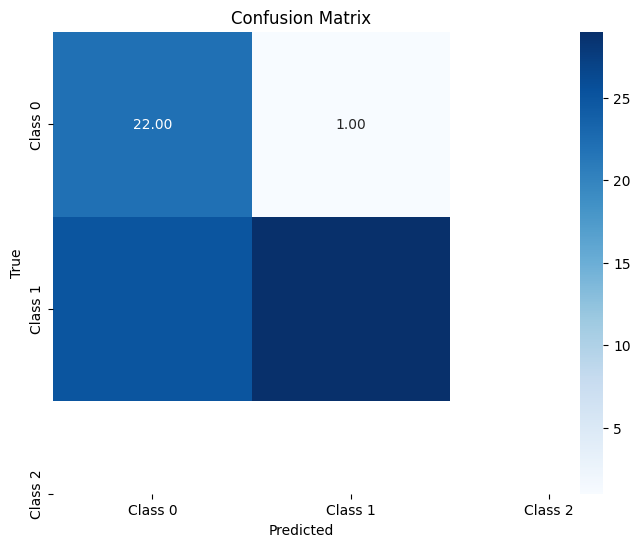

In [50]:
plt.figure(figsize=(8, 6))
sns.heatmap(cnfm, annot=True, fmt='.2f', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'],)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [51]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_grid).ravel()

In [52]:
print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")

True positives: 29
False positives: 25
True negatives: 22
False negatives: 1



# Random Forest Using Without GridSearch CV

In [53]:
rdm.fit(X_train,y_train)

RandomForestClassifier()

In [54]:
rdm.score(X_test,y_test)

0.6493506493506493

In [55]:
y_predict_rdm=rdm.predict(X_test)

In [56]:
accuracy_rdm=accuracy_score(y_predict_rdm,y_test)
accuracy_rdm

0.6493506493506493

In [57]:
print(accuracy_score(y_predict_rdm,y_test))
print(classification_report(y_predict_rdm,y_test))
print(confusion_matrix(y_predict_rdm,y_test))


0.6493506493506493
              precision    recall  f1-score   support

           0       0.47      0.92      0.62        24
           1       0.93      0.53      0.67        53

    accuracy                           0.65        77
   macro avg       0.70      0.72      0.65        77
weighted avg       0.79      0.65      0.66        77

[[22  2]
 [25 28]]


In [58]:
from sklearn.model_selection import cross_val_score

In [59]:
cvs=cross_val_score(rdm,x,y,cv=5)
cvs

array([0.78861789, 0.7398374 , 0.77235772, 0.78861789, 0.79508197])

In [60]:
# Final all acuracy model
result=pd.DataFrame({
    'Random_forest_GRID': [accuracy_rdm_grid],
    'Random_forest': [accuracy_rdm]
    
})
print(result)

   Random_forest_GRID  Random_forest
0            0.662338       0.649351


# Conclusion